In [3]:
import random
import time
import statistics
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
def randomquicksort(alist,times):
   comp = [0]
   randomquicksorthelper(alist,0,len(alist)-1,comp)
   times.append(comp[0])

In [5]:
def randomquicksorthelper(alist,first,last,comp):
   if first<last:

       r = randompartition(alist,first,last)
       splitpoint = r[0]
       tmp = comp.pop()
       comp.append(tmp+r[1])
    
       randomquicksorthelper(alist,first,splitpoint-1,comp)
       randomquicksorthelper(alist,splitpoint+1,last,comp)

In [6]:
def randompartition(alist,first,last):
  
   indxpiv = random.randint(first,last)
   temp = alist[indxpiv]
   alist[indxpiv] = alist[first]
   alist[first] = temp
   
   pivotvalue = alist[first]
   compspart = 0

   leftmark = first+1
   rightmark = last

   done = False
   while not done:

       while leftmark <= rightmark and alist[leftmark] <= pivotvalue:
           leftmark = leftmark + 1
           compspart = compspart + 1
       compspart = compspart + 1

       while alist[rightmark] >= pivotvalue and rightmark >= leftmark:
           rightmark = rightmark -1
           compspart = compspart + 1
       compspart = compspart + 1

       if rightmark < leftmark:
           done = True
       else:
           temp = alist[leftmark]
           alist[leftmark] = alist[rightmark]
           alist[rightmark] = temp

   temp = alist[first]
   alist[first] = alist[rightmark]
   alist[rightmark] = temp


   return rightmark,compspart

In [7]:
def randomquicksorttimedistrib(s,r):
    
    # Create an array of 1 .. n  
    n=s
    runs=r
    x = []
    for i in range(1,n+1):
        x.append(n+1-i)
        
     # Run quicksort for each permutation
    times = [0]*10000
    tlist = []
    for p in range(1,runs+1):
        y = list(x)
        randomquicksort(y,tlist)
        if p%1000 == 0:
            av = sum(tlist)/len(tlist)
            tlist = []
            times[int(p/1000)-1] = av
    
#     print(times)
    
    plt.hist(times)
    plt.title("Number of comparison of Quicksort for all permutaions")
    plt.xlabel("Comparisons of elements")
    plt.ylabel("Frequency")
    plt.show()
    
    print("n",n)
    print("runs",runs)
    print("mean",statistics.mean(times))
    print("stdev",statistics.stdev(times))
    print("min",min(times))
    print("max",max(times))

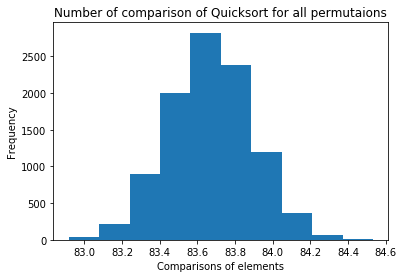

n 16
runs 10000000
mean 83.6691584
stdev 0.22145012288353447
min 82.916
max 84.533
Time taken:  14.0  minutes and  12.101624250411987  seconds


In [8]:
tim = time.time()
randomquicksorttimedistrib(16,10000000)
tim = time.time() - tim

minutes, seconds = tim // 60, tim % 60
print("Time taken: ",minutes," minutes and ",seconds," seconds")